In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\sanat\OneDrive\Desktop\ML_WORK\MODULAR\MY_ML_PRACTICE\data\Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
x = df
x.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()


In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
test_pred = model.predict(X_test)
test_pred

array([14.7, 19.8, 11.9, 16.7,  9.5,  6.6, 20.2, 17. , 10.3, 20.1, 10.9,
       14.1, 11.5, 23.7, 19.2, 10.1, 12. ,  9.5,  8.4, 21.5,  7.6, 19. ,
       27. , 24.2,  9.3, 11.4, 20.7,  9.7, 12.6,  9.3,  9.2, 19.6, 11.2,
        5.6, 17.1,  9.6, 10.6,  9.7,  7.3, 10.5, 12.5, 10.3, 11.4,  7. ,
       11.8, 11.3,  5.3, 14.8, 12.9, 22.4, 10.4, 12.9, 14.8, 11.9, 10.6,
        3.2, 25.4, 10.8, 17.4, 14.9, 15.2, 26.2,  8.8, 21.2, 11.7, 22.2])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
mean_absolute_error(y_test, test_pred) 

4.858066810784018e-15

In [16]:
mean_squared_error(y_test, test_pred)

3.6036600443050765e-29

In [17]:
np.sqrt(mean_squared_error(y_test, test_pred))

6.003049262087624e-15

In [18]:
test_residuals = y_test - test_pred
test_residuals

37    -3.552714e-15
109    1.065814e-14
31    -1.776357e-15
89    -3.552714e-15
66    -3.552714e-15
           ...     
183    1.065814e-14
127   -3.552714e-15
53     3.552714e-15
100    0.000000e+00
93     3.552714e-15
Name: sales, Length: 66, dtype: float64

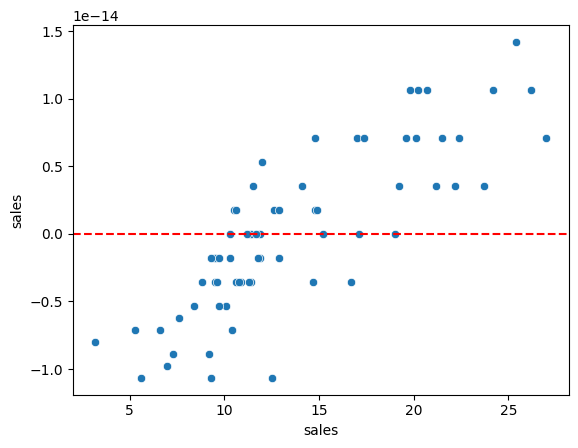

In [19]:
sns.scatterplot(x=y_test, y=test_residuals)
#it looks like random, no pattern in the residual plot can be seen so linear regression can be used
plt.axhline(y=0, color='red', ls='--')

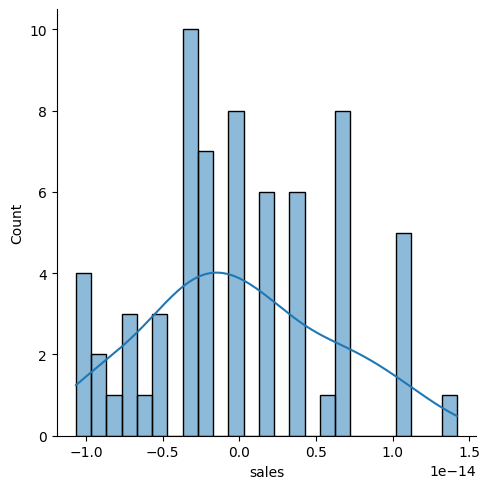

In [20]:
sns.displot(test_residuals, bins=25, kde=True) #kernel density estimation

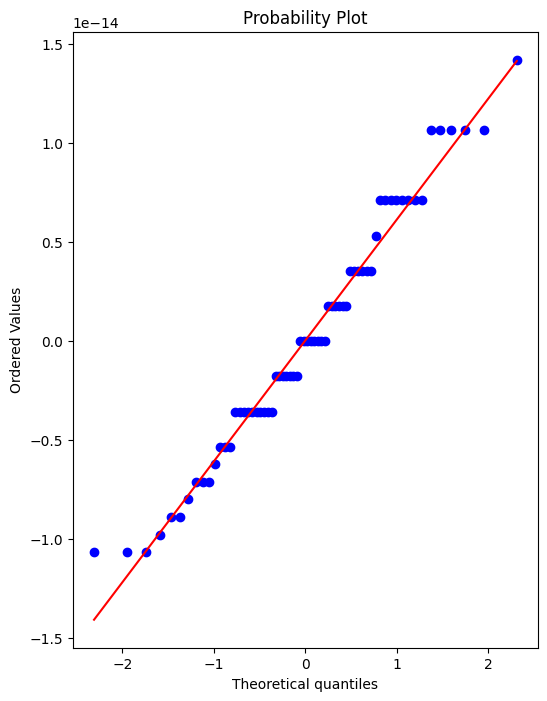

In [22]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,8),dpi=100)

_= sp.stats.probplot(test_residuals,plot=ax)


In [23]:
model.coef_

array([-3.86853128e-17,  0.00000000e+00,  8.86667107e-17,  1.00000000e+00])

In [24]:
y_hat = model.predict(x)

Text(0.5, 1.0, 'Newspaper spend')

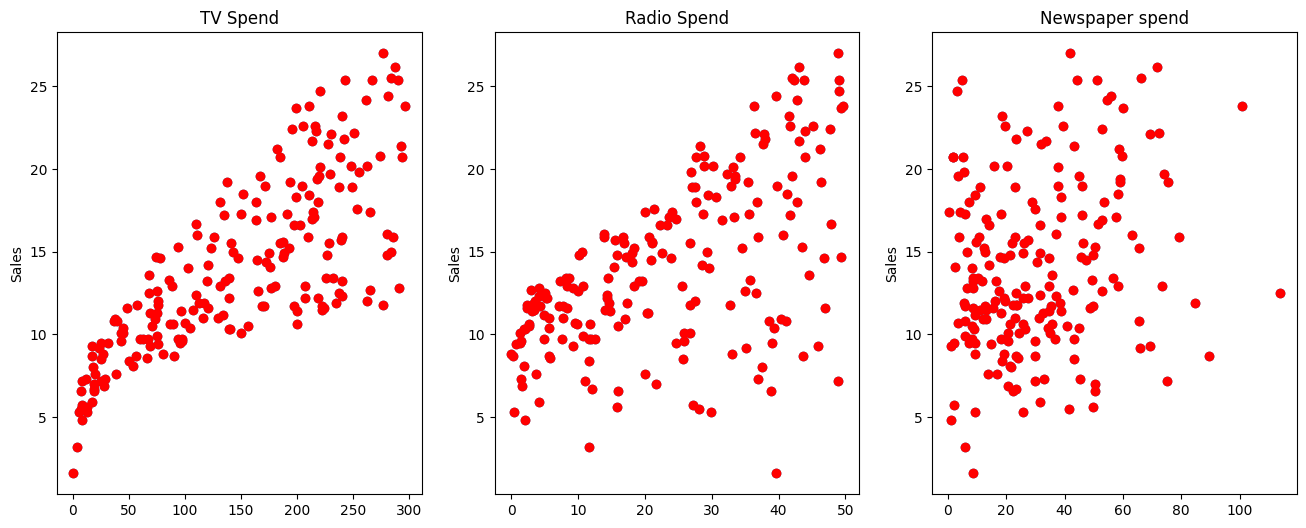

In [25]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'],y_hat, 'o', color='red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'],y_hat, 'o', color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper spend")